In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kc-housesales-data/kc_house_data.csv


In [2]:
## Load Kc house price data
data = pd.read_csv('/kaggle/input/kc-housesales-data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Install pycaret library
!pip install pycaret

     |████████████████████████████████| 188 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 92 kB 238 kB/s  eta 0:00:01
     |████████████████████████████████| 7.3 MB 56.9 MB/s eta 0:00:01
     |████████████████████████████████| 378 kB 42.7 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 6.4 MB/s  eta 0:00:01
     |████████████████████████████████| 259 kB 48.8 MB/s eta 0:00:01
     |████████████████████████████████| 142.8 MB 46 kB/s s eta 0:00:01
     |████████████████████████████████| 7.0 MB 33.3 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 55.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 28.0 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 63.9 MB 42.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 39.3 MB/s eta 0:00:01
     |████████████████████████████████| 234 kB 39.0 MB/s eta 0:00:01
     |█████████████████████████████

     |████████████████████████████████| 46 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 64 kB 2.2 MB/s  eta 0:00:01


  Created wheel for pyod: filename=pyod-0.7.8.2-py3-none-any.whl size=104995 sha256=38b46a8d935c3dce1d1f80b52172199e53f71d16c1266e0fc4c0434b7c8e2e3d
  Stored in directory: /root/.cache/pip/wheels/10/fe/00/43c92b20898d143981b2c5af301b279efad92768151812a8ac
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=378423 sha256=e69444ceab90c47209d24e17502b66ef7e65ea194c93909cd9b0ef0df4888ddd
  Stored in directory: /root/.cache/pip/wheels/a7/ff/03/886798ca6fff0eb242a9a2d4b61ab1a1523eda4204632d811b
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=5d2b4b9b158960ac705a2abec7fafa8c507505817af42d0cf1d973b3cedaf521
  Stored in directory: /root/.cache/pip/wheels/45/1e/db/6e3d57f26a78ce7ecc352822a6700e047746bdd79c9680c77d
  Created wheel for cufflinks: filename=cufflinks-0.17.0-py3-none-any.whl size=67743 sha256=454a4b424469168a2e474c188dd02920474abd8720ccdc8b6e5694dcd92c3b05
  Stored in directory: /root/.cache/pip

In [6]:
# Initiallize the data and fuctioning : Once initialize press 'Y'
from pycaret.regression import *
clf1 = setup(data = data, target = 'price')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8503
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(21597, 21)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
# Compare performance of the model through various regression model on various comparision metrics
compare_models()

IntProgress(value=0, description='Processing: ', max=245)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:20:53
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,1.197838e+05,3.638165e+10,1.904751e+05,7.249000e-01,0.3212,2.327000e-01
1,Lasso Regression,1.197201e+05,3.638139e+10,1.904935e+05,7.248000e-01,0.3181,2.323000e-01
2,Lasso Least Angle Regression,1.196490e+05,3.638134e+10,1.904912e+05,7.248000e-01,0.3166,2.321000e-01
3,Linear Regression,1.197391e+05,3.638674e+10,1.905082e+05,7.247000e-01,0.3183,2.324000e-01
4,Bayesian Ridge,1.197698e+05,3.641238e+10,1.905607e+05,7.246000e-01,0.3233,2.326000e-01
5,Random Sample Consensus,1.154522e+05,3.773531e+10,1.939094e+05,7.155000e-01,0.2773,2.155000e-01
6,Orthogonal Matching Pursuit,1.368916e+05,4.717354e+10,2.168316e+05,6.437000e-01,0.3363,2.616000e-01
7,TheilSen Regressor,1.269057e+05,5.551519e+10,2.333936e+05,5.907000e-01,0.3732,2.344000e-01
8,Elastic Net,1.578070e+05,5.810126e+10,2.404756e+05,5.632000e-01,0.3853,3.265000e-01
9,Passive Aggressive Regressor,3.107038e+05,2.160874e+11,4.616096e+05,-6.146000e-01,0.8134,5.833000e-01


KeyboardInterrupt: 

In [8]:
# Check Linear reg model's performance on 10 kfold CV 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,121411.6897,3.265985e+10,180720.3746,0.6824,0.3427,0.2478
1,123027.7814,3.493372e+10,186905.6487,0.7655,0.2984,0.2294
2,120564.9231,3.953984e+10,198846.2782,0.7443,0.3023,0.2253
3,117792.2880,3.956851e+10,198918.3623,0.7393,0.2926,0.2262
4,118460.2989,3.225876e+10,179607.2479,0.7120,0.3352,0.2350
5,114919.4805,3.020781e+10,173803.9387,0.7186,0.2972,0.2319
6,125528.3347,4.061426e+10,201529.8031,0.7208,0.3409,0.2439
7,117208.6593,3.519956e+10,187615.4473,0.7012,0.3611,0.2290
8,120890.8980,3.797790e+10,194879.1932,0.7199,0.3023,0.2244
9,117586.1845,4.090723e+10,202255.3512,0.7432,0.3106,0.2311


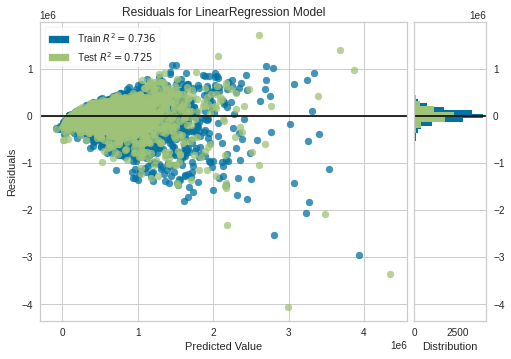

In [9]:
# Plot the model
plot_model(lr)

In [13]:
# ensembling Linear regression model (boosting)
lr_boosted = ensemble_model(lr, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,162109.9596,5.223313e+10,228545.6804,0.4921,0.6184,0.3540
1,164469.3889,4.989532e+10,223372.6086,0.6651,0.5787,0.3401
2,163966.7022,5.126285e+10,226413.0102,0.6685,0.6742,0.3505
3,126816.3389,3.808785e+10,195161.0795,0.7490,0.3866,0.2558
4,164414.7979,5.030547e+10,224288.8041,0.5509,0.5578,0.3474
5,150194.4913,4.474552e+10,211531.3719,0.5831,0.5717,0.3241
6,137547.9357,4.178020e+10,204402.0619,0.7128,0.4245,0.2798
7,164841.8288,5.523720e+10,235025.9644,0.5311,0.5678,0.3480
8,161897.1638,5.430007e+10,233023.7544,0.5996,0.6274,0.3306
9,172342.4379,5.903867e+10,242978.7355,0.6294,0.6869,0.3756


In [15]:
# evaluate a model 
evaluate_model(lr_boosted)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
# generate predictions on holdout
lr_predictions_holdout = predict_model(lr_boosted)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ada Boost Regressor,155060.3002,5.177249e+10,227535.681,0.6243,0.5732,0.3314


In [17]:
# finalize model
lr_final = finalize_model(lr_boosted)

In [20]:
# deploy model
deploy_model(model = lr_final, model_name = 'deploy_lr', platform ='flask', authentication = {'bucket' : 'pycaret-test'})

TypeError: deploy_model() missing 1 required positional argument: 'authentication'